In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import pandas as pd
import sqlite3
import rubin_sim
import rubin_sim.maf as maf
from rubin_sim.scheduler.utils import SkyAreaGenerator
from rubin_sim.data import get_baseline
rubin_sim.__version__
import meanz_modules as mzmod

In [2]:
from os import path
opsim_fname = rubin_sim.data.get_baseline()
run_name = path.splitext(path.basename(opsim_fname))[0]
nside=64

In [3]:
# # Routines to do stuff with maps - so we can make a survey mask.
# def load_maf_map(fname):
    
#     fin = maf.MetricBundle(
#         metric=maf.ExgalM5(),
#         slicer=maf.HealpixSubsetSlicer(nside=nside, use_cache=False, hpid=np.where(map_labels == "lowdust")[0]),
#         constraint='note not like "DD%" and note not like "twilight_neo"'
#     )
#     fin._setup_metric_values()
#     #counts/map values
#     opmap=fin.metric_values
#     mafmap=np.copy(opmap.data)
#     mafmap[opmap.mask]=0
#     mafmap[mafmap>0]=1
    
#     return mafmap

# def maf_maps_to_fits(fname_in, fname_out):
#     usemap = load_maf_map(fname_in)
#     # save this into fits file:
#     hp.write_map(fname_out, usemap, overwrite=True)
#     print("Written: %s"%fname_out)
    

## Let's start with a simple metric bundle of only the ExgalM5 metric
This is the extinction-corrected limiting magnitude in a single band.
Remember that the list of metrics is here: https://rubin-sim.lsst.io/rs_maf/metric_list.html

In [4]:
# # Potential TODO: allow customization of metric resolution
# nside=64

# # The next two lines are used later, when we want to impose a cut based on the level of dust to avoid the plane.
# surveyAreas = SkyAreaGenerator(nside=nside)
# map_footprints, map_labels = surveyAreas.return_maps()

# # Here we define a function for some of the metric plots we want to show.
# def metric_plots(use_run_name, use_opsim_fname, use_metric=maf.ExgalM5(), use_color_min=None, use_color_max=None,
#                 year=10):
#     # use_run_name says which OpSim DB we want to use, e.g. `baseline_v2.1_10yrs` - will also be used for labels
#     # use_opsim_fname says where it lives, e.g. `/global/cfs/cdirs/lsst/groups/CO/rubin_sim/sim_baseline/baseline_v2.1_10yrs.db`
#     days = year*365.25
#     # Here the constraint on use of i-band data, exclusion of DDFs, time limitations, and avoiding twilight exposures 
#     constraint_str='filter="i" and note not like "DD%" and night <= XX and note not like "twilight_neo" '
#     constraint_str = constraint_str.replace('XX','%d'%days)
    
#     # Just some optional plotting stuff
#     if use_color_min is not None and use_color_max is not None:
#         plot_dict={"color_min": use_color_min, "color_max": use_color_max, "x_min": use_color_min, "x_max": use_color_max}
#     else:
#         plot_dict=None
        
#     # Decide what summary statistics we want
#     my_summary_stats = [maf.MedianMetric(), maf.MeanMetric(), maf.RmsMetric(), maf.PercentileMetric(percentile=25), maf.PercentileMetric(percentile=75)]
    
#     # First, define a MetricBundle object.
#     depth_map_bundle = maf.MetricBundle(
#         metric=use_metric,
#         # Exclude the galactic plane
#         slicer=maf.HealpixSubsetSlicer(nside=nside, use_cache=False, hpid=np.where(map_labels == "lowdust")[0]),
#         constraint=constraint_str,
#         run_name=use_run_name,
#         summary_metrics=my_summary_stats,
#         plot_dict=plot_dict
#     )
    
#     bd = maf.metricBundles.make_bundles_dict_from_list([depth_map_bundle])
#     bgroup = maf.MetricBundleGroup(
#         bd, use_opsim_fname
#     )
#     bgroup.run_all()
    
#     return bgroup, bd

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


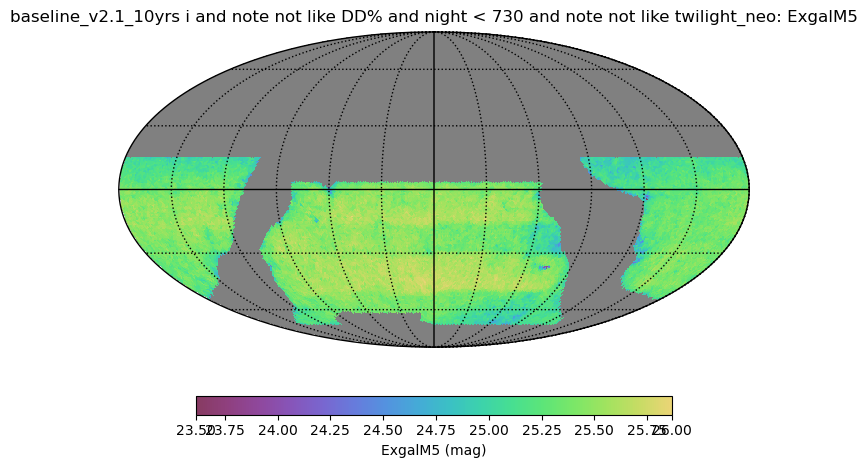

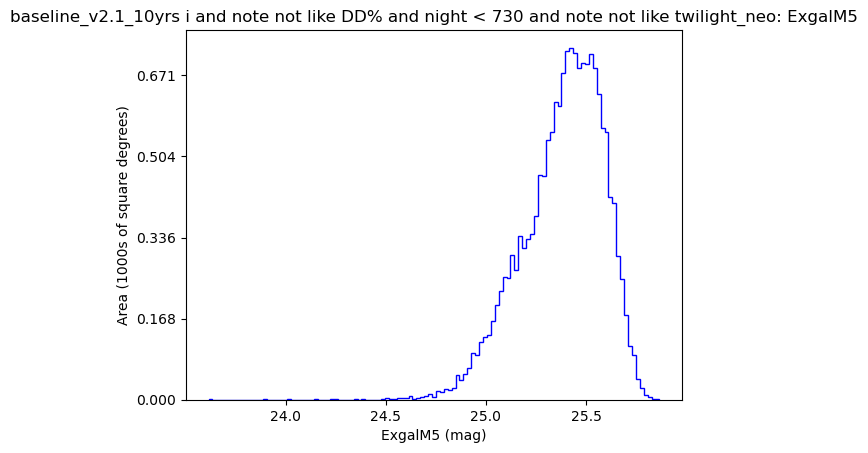

In [5]:
# Apply the above routine to our baseline sim, and show the plots
bgroup, bd = mzmod.metric_plots(run_name, opsim_fname, year=2,nside=nside)
bgroup.plot_all(closefigs=False)

In [6]:
pd.DataFrame([bd[k].summary_values for k in bd], index=list(bd.keys()))

,Median,Mean,Rms,25th%ile,75th%ile
baseline_v2_1_10yrs_ExgalM5_i_and_note_not_like_DD_and_night_lt_730_and_note_not_like_twilight_neo_HEAL,25.409858,25.381524,0.200743,25.261927,25.530783


### Dataset definitions

In [7]:
v33_sim_list = ['/pscratch/sd/r/rhlozek/rubin_sim_data/sim_baseline/baseline_v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/noroll_v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season6v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season2v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season4v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season2v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season4v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season6v3.3_10yrs.db',]
v33_name_list = [path.splitext(path.basename(sim))[0] for sim in v33_sim_list]

## In this section, we get maps of the i-band depth across the survey for v3.3 simulations at year=3

Our goal is to inspect them for coherent patterns.

In [8]:
# Run our above routine for the v3.3 simulations at year 3
for i in range(len(v33_sim_list)):
    this_run = v33_sim_list[i]
    this_fname = v33_name_list[i]
    bgroup, bd = mzmod.metric_plots(this_fname, this_run, year=3)
    bgroup.plot_all(closefigs=False)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


### Metric calculations at each year for all v3.3 simulations

We save a dataframe to disk at the end of this, so that in future runs we can skip this entire section and immediately go to the next step: making plots.

In [ ]:
# # First define a routine to run across a list of years and produce a dataframe
# def get_year_by_year_metrics(year_list, name_list, sim_list):
#     overall_names = []
#     overall_years = []
#     overall_meds = []
#     overall_means = []
#     overall_std = []
#     overall_iqr = []
#     for year in year_list:
#         for i in range(len(sim_list)):
#             bgroup, bd = metric_plots(name_list[i], sim_list[i], year=year)
#             overall_names.append(name_list[i])
#             overall_years.append(year)
#             overall_meds.append(bd[list(bd.keys())[0]].summary_values['Median'])
#             overall_means.append(bd[list(bd.keys())[0]].summary_values['Mean'])
#             overall_std.append(bd[list(bd.keys())[0]].summary_values['Rms'])
#             overall_iqr.append(bd[list(bd.keys())[0]].summary_values['75th%ile']-bd[list(bd.keys())[0]].summary_values['25th%ile'])
#     df = pd.DataFrame(list(zip(overall_names, overall_years, overall_meds, overall_means, overall_std, overall_iqr)), 
#                   columns=['Strategy', 'Year', 'Median i-band depth', 'Mean i-band depth', 'Std i-band depth', 'IQR i-band depth'])
#     return df

In [ ]:
import meanz_modules as mzmod
v33_df = mzmod.get_year_by_year_metrics(np.arange(1,11), v33_name_list, v33_sim_list)
display(v33_df)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


In [ ]:
v33_df.to_pickle('v33_dataframe.pkl')

### Here we plot the year-by-year metric results.  

We read in from the dataframe, so if it was already produced, we can skip over the previous chunk of notebook.

In [ ]:
v33_df = pd.read_pickle('v33_dataframe.pkl')

In [ ]:
# # A utility to plot summary stats for strategies as a function of year, given a dataframe from the above routines.
# def plot_metric_by_year(df, stat_name, y_axis_label=None):
#     year_vals = np.array(list(set(df['Year'])))
#     strategies=list(set(df['Strategy']))
#     fig = plt.figure()
#     ax = fig.add_subplot(111)

#     # Offset axes:
#     offsets = 0.05*np.arange(0,len(strategies))
#     offsets -= np.mean(offsets)
#     offset_index = 0

#     # y-axis label handling
#     if y_axis_label is None:
#         y_axis_label = stat_name

#     # rotate through line styles:
#     my_line_styles = ['--', '-', ':']
#     line_style_index = 0
#     for s in strategies:
#         yvals = np.array(df[stat_name][df['Strategy']==s])
#         ax.plot(year_vals+offsets[offset_index], yvals, label=s, linestyle = my_line_styles[line_style_index])
#         offset_index += 1
#         line_style_index += 1
#         if line_style_index >= len(my_line_styles): line_style_index=0
#     plt.xlabel('Year')
#     plt.ylabel(y_axis_label)
#     plt.legend()
#     plt.show()

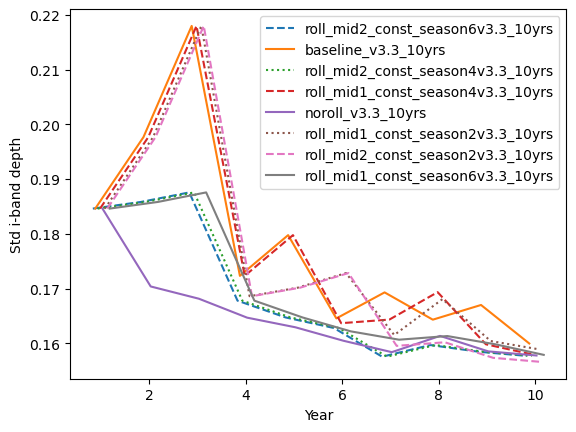

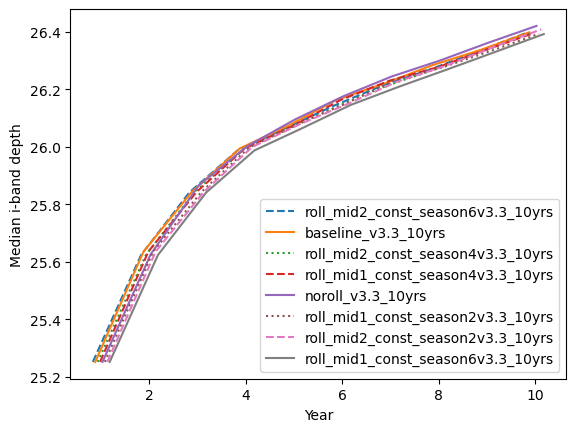

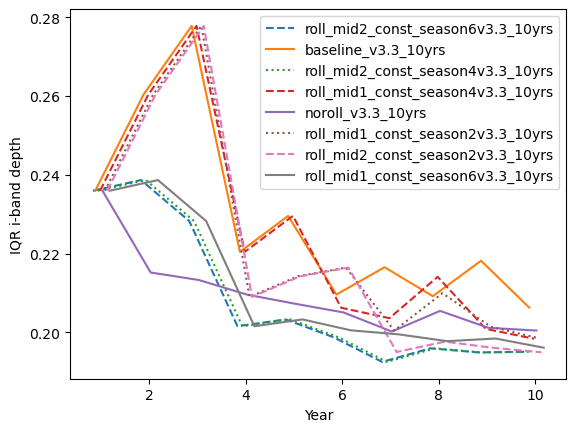

In [ ]:
# Plot various quantities using utility routine
mzmod.plot_metric_by_year(v33_df, 'Std i-band depth')
mzmod.plot_metric_by_year(v33_df, 'Median i-band depth')
mzmod.plot_metric_by_year(v33_df, 'IQR i-band depth')

### Explore some v2.2 sims that Matt had been using for his tests

In particular, we wanted to inspect years 4 and 7 as they are interesting ones for mid-survey analysis.

In [ ]:
v22_sim_list = ['/pscratch/sd/b/beckermr/v2.2_sims_rubin/baseline_v2.2_10yrs.db',
               '/pscratch/sd/b/beckermr/v2.2_sims_rubin/noroll_v2.2_10yrs.db',
               '/pscratch/sd/b/beckermr/v2.2_sims_rubin/roll_with_const_roll_indx0_v2.2_10yrs.db',
               '/pscratch/sd/b/beckermr/v2.2_sims_rubin/roll_with_const_roll_indx4_v2.2_10yrs.db']
v22_name_list = [path.splitext(path.basename(sim))[0] for sim in v22_sim_list]
year_list = np.array([4,7])

In [ ]:
v22_df = get_year_by_year_metrics(year_list, v22_name_list, v22_sim_list)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [ ]:
# Just show the results and save to file.
display(v22_df)
v22_df.to_pickle('v22_dataframe.pkl') 

,Strategy,Year,Median i-band depth,Mean i-band depth,Std i-band depth,IQR i-band depth
0,baseline_v2.2_10yrs,4,25.852912,25.825902,0.167054,0.215864
1,noroll_v2.2_10yrs,4,25.857038,25.826906,0.164022,0.208852
2,roll_with_const_roll_indx0_v2.2_10yrs,4,25.845041,25.821480,0.162347,0.204231
3,roll_with_const_roll_indx4_v2.2_10yrs,4,25.845957,25.809098,0.178610,0.229426
4,baseline_v2.2_10yrs,7,26.058475,26.045479,0.164396,0.196532
5,noroll_v2.2_10yrs,7,26.086598,26.057637,0.160865,0.207024
6,roll_with_const_roll_indx0_v2.2_10yrs,7,26.067552,26.045096,0.157526,0.197889
7,roll_with_const_roll_indx4_v2.2_10yrs,7,26.066950,26.036302,0.167468,0.213074


### Below we had started to play with the RIZ exposure time - have not cleaned it up yet.

Would need to make some of the above routines less dependent on the specific metric choice.

In [ ]:
sim_list = ['/pscratch/sd/r/rhlozek/rubin_sim_data/sim_baseline/baseline_v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/noroll_v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season2v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season4v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season6v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season2v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season4v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season6v3.3_10yrs.db',]
name_list = [path.splitext(path.basename(sim))[0] for sim in sim_list]
year_list = np.arange(1,11)
#print(sim_list)
#print(name_list)
#print(year_list)
overall_names = []
overall_years = []
overall_meds = []
overall_means = []
overall_std = []
overall_iqr = []
for year in year_list:
    for i in range(len(sim_list)):
        bgroup, bd = metric_plots(name_list[i], sim_list[i], use_metric=maf.RIZDetectionCoaddExposureTime(), year=year)
        print(sim_list[i], name_list[i], year, bd[list(bd.keys())[0]].summary_values)
        overall_names.append(name_list[i])
        overall_years.append(year)
        overall_meds.append(bd[list(bd.keys())[0]].summary_values['Median'])
        overall_means.append(bd[list(bd.keys())[0]].summary_values['Mean'])
        overall_std.append(bd[list(bd.keys())[0]].summary_values['Rms'])
        overall_iqr.append(bd[list(bd.keys())[0]].summary_values['75th%ile']-bd[list(bd.keys())[0]].summary_values['25th%ile'])
df = pd.DataFrame(list(zip(overall_names, overall_years, overall_meds, overall_means, overall_std, overall_iqr)), 
                  columns=['Strategy', 'Year', 'Median i-band depth', 'Mean i-band depth', 'Std i-band depth', 'IQR i-band depth'])

df2 = pd.DataFrame(list(zip(overall_names, overall_years, overall_meds, overall_means, overall_std, overall_iqr)), 
                  columns=['Strategy', 'Year', 'Median RIZ exposure time', 'Mean RIZ exposure time', 'Std RIZ exposure time', 'IQR RIZ exposure time'])
display(df2)
df2.to_pickle('magic_dataframe2.pkl') 

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


/pscratch/sd/r/rhlozek/rubin_sim_data/sim_baseline/baseline_v3.3_10yrs.db baseline_v3.3_10yrs 1 {'Median': 600.0, 'Mean': 584.8494437577256, 'Rms': 90.5787917002157, '25th%ile': 510.0, '75th%ile': 660.0}
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/noroll_v3.3_10yrs.db noroll_v3.3_10yrs 1 {'Median': 600.0, 'Mean': 584.8494437577256, 'Rms': 90.5787917002157, '25th%ile': 510.0, '75th%ile': 660.0}
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season2v3.3_10yrs.db roll_mid1_const_season2v3.3_10yrs 1 {'Median': 600.0, 'Mean': 584.8494437577256, 'Rms': 90.5787917002157, '25th%ile': 510.0, '75th%ile': 660.0}
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season4v3.3_10yrs.db roll_mid1_const_season4v3.3_10yrs 1 {'Median': 600.0, 'Mean': 584.849

,Strategy,Year,Median RIZ exposure time,Mean RIZ exposure time,Std RIZ exposure time,IQR RIZ exposure time
0,baseline_v3.3_10yrs,1,600.0,584.849444,90.578792,150.0
1,noroll_v3.3_10yrs,1,600.0,584.849444,90.578792,150.0
2,roll_mid1_const_season2v3.3_10yrs,1,600.0,584.849444,90.578792,150.0
3,roll_mid1_const_season4v3.3_10yrs,1,600.0,584.849444,90.578792,150.0
4,roll_mid1_const_season6v3.3_10yrs,1,600.0,584.849444,90.578792,150.0
...,...,...,...,...,...,...
75,roll_mid1_const_season4v3.3_10yrs,10,5430.0,5412.906304,274.141029,330.0
76,roll_mid1_const_season6v3.3_10yrs,10,5430.0,5418.609642,275.503728,360.0
77,roll_mid2_const_season2v3.3_10yrs,10,5430.0,5420.192336,277.261511,360.0
78,roll_mid2_const_season4v3.3_10yrs,10,5400.0,5411.227194,274.593264,330.0


[ 1  2  3  4  5  6  7  8  9 10] ['roll_mid2_const_season6v3.3_10yrs', 'baseline_v3.3_10yrs', 'roll_mid1_const_season2v3.3_10yrs', 'roll_mid2_const_season4v3.3_10yrs', 'noroll_v3.3_10yrs', 'roll_mid1_const_season6v3.3_10yrs', 'roll_mid1_const_season4v3.3_10yrs', 'roll_mid2_const_season2v3.3_10yrs']


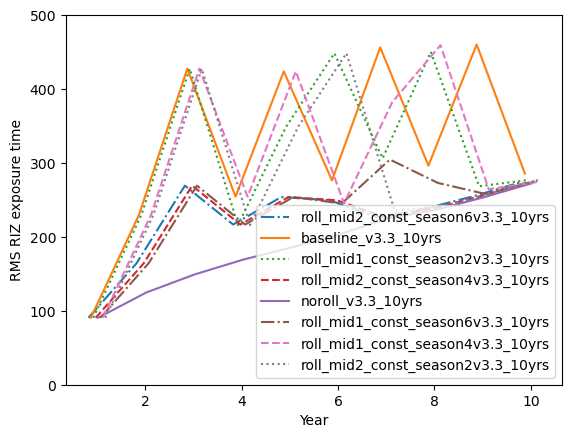

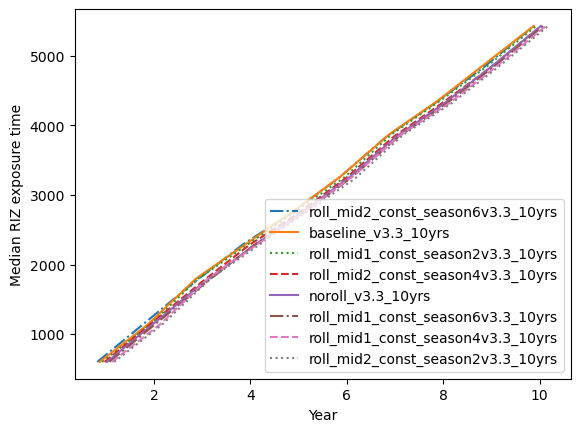

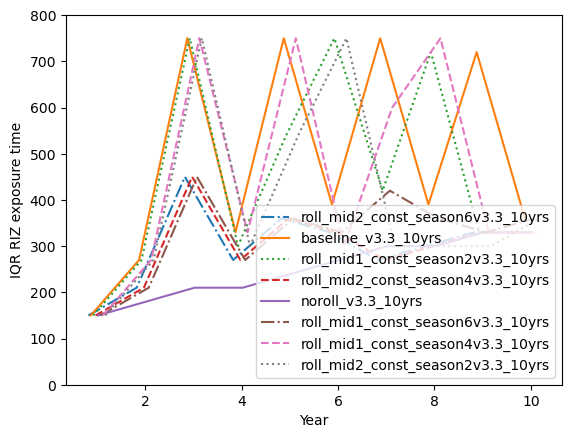

In [ ]:
x=np.array(list(set(df2['Year'])))
strategies=list(set(df2['Strategy']))
print(x, strategies)
fig = plt.figure()
ax = fig.add_subplot(111)
offsets = 0.05*np.arange(0,len(strategies))
offsets -= np.mean(offsets)
offset_index = 0
for s in strategies:
    y1=np.array(df2['Std RIZ exposure time'][df['Strategy']==s])
    if 'season2' in s: my_linestyle = 'dotted'
    elif 'season4' in s: my_linestyle = 'dashed'
    elif 'season6' in s: my_linestyle = 'dashdot'
    else: my_linestyle = 'solid'
    ax.plot(x+offsets[offset_index], y1, label=s, linestyle=my_linestyle)
    offset_index += 1
plt.xlabel('Year')
plt.ylabel('RMS RIZ exposure time')
plt.ylim([0,500])
plt.legend(loc='lower right')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
offset_index = 0
for s in strategies:
    y2=np.array(df2['Median RIZ exposure time'][df['Strategy']==s])
    if 'season2' in s: my_linestyle = 'dotted'
    elif 'season4' in s: my_linestyle = 'dashed'
    elif 'season6' in s: my_linestyle = 'dashdot'
    else: my_linestyle = 'solid'
    ax.plot(x+offsets[offset_index], y2, label=s, linestyle=my_linestyle)
    offset_index += 1
plt.xlabel('Year')
plt.ylabel('Median RIZ exposure time')
plt.legend(loc='lower right')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
offset_index = 0
for s in strategies:
    y3=np.array(df2['IQR RIZ exposure time'][df['Strategy']==s])
    if 'season2' in s: my_linestyle = 'dotted'
    elif 'season4' in s: my_linestyle = 'dashed'
    elif 'season6' in s: my_linestyle = 'dashdot'
    else: my_linestyle = 'solid'
    ax.plot(x+offsets[offset_index], y3, label=s, linestyle=my_linestyle)
    offset_index += 1
plt.xlabel('Year')
plt.ylim([0,800])
plt.ylabel('IQR RIZ exposure time')
plt.legend(loc='lower right')
plt.show()


### What if we want to change the opsim we are using?
We define a new opsim file name and then regenerate the metric on this new opsim

No roll v3.3 will be read from /pscratch/sd/r/rhlozek/rubin_sim_data/noroll/noroll_v3.3_10yrs.db
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Bundle diagnostics No roll v3.3 ExgalM5 i and note not like DD% and note not like twilight_neo HealpixSubsetSlicer


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


,Median,Mean,Rms
No_roll_v3_3_ExgalM5_i_and_note_not_like_DD_and_note_not_like_twilight_neo_HEAL,26.4203,26.391543,0.157775


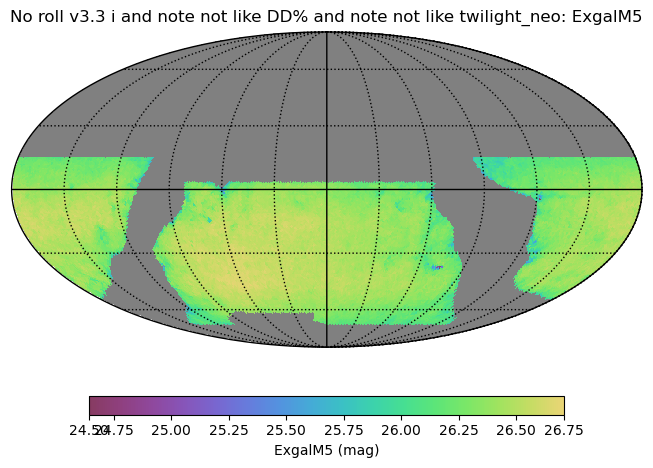

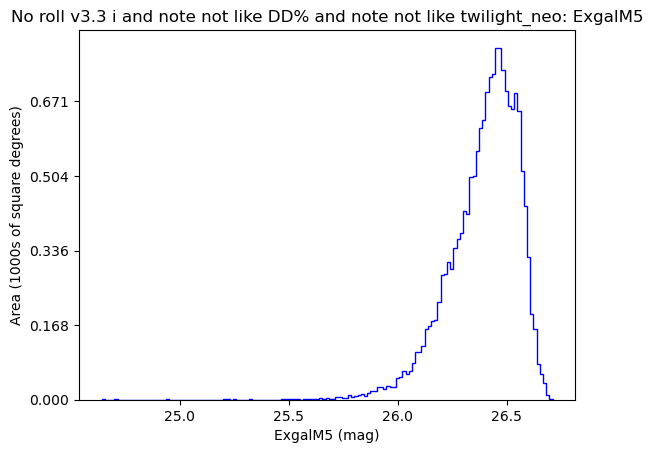

In [ ]:
# This lives in Renee's space and she has hacked permissions so the rest of us can read it.  
# But Heather is going to make these accessible in a more sound way.  We'll make and show the same plots for this new strategy.
new_opsim_fname = '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/noroll_v3.3_10yrs.db'
new_run_name = 'No roll v3.3'
print(f"{new_run_name} will be read from {new_opsim_fname}")
newbgroup, newbd = metric_plots(new_run_name, new_opsim_fname)
newbgroup.plot_all(closefigs=False)
pd.DataFrame([newbd[k].summary_values for k in newbd], index=list(newbd.keys()))

In [ ]:
# All together now, just summary stats
sim_list = ['/pscratch/sd/r/rhlozek/rubin_sim_data/sim_baseline/baseline_v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/noroll_v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season2v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season4v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season6v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season2v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season4v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season6v3.3_10yrs.db',]
name_list = [path.splitext(path.basename(sim))[0] for sim in sim_list]
for sim in range(len(name_list)):
    tmpbgroup, tmpbd = metric_plots(name_list[i], sim_list[i])
    print(tmpbd[list(tmpbd.keys())[0]].summary_values)
    #pd.DataFrame([tmpbd[k].summary_values for k in tmpbd], index=list(tmpbd.keys()))    


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Bundle diagnostics baseline_v3.3_10yrs ExgalM5 i and note not like DD% and night < 3653 and note not like twilight_neo HealpixSubsetSlicer
{'Median': 26.398118929020136, 'Mean': 26.36654701955083, 'Rms': 0.15996924818962502}
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Bundle diagnostics baseline_v3.3_10yrs ExgalM5 i and note not like DD% and night < 3653 and note not like twilight_neo HealpixSubsetSlicer
{'Median': 26.398118929020136, 'Mean': 26.36654701955083, 'Rms': 0.15996924818962502}
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Bundle diagnostics baseline_v3.3_10yrs ExgalM5 i and note not like DD% and night < 3653 and note not like twilight_neo HealpixSubsetSlicer
{'Median': 26.398118929020136, 'Mean': 26.36654701955083, 'Rms': 0.15996924818962502}
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Bundle diagnostics baseli

In [ ]:
# # Define combined plotting routine - base it on Renee's
# def combined_metric_plots(use_run_name_vec, use_opsim_fname_vec, 
#                           use_metric=maf.ExgalM5(), year=10, use_color_min=None, use_color_max=None):
#     # use_run_name_vec says which OpSim DBs we want to use - will also be used for labels
#     # use_opsim_fname_vec says where they live, e.g. one item might be `/global/cfs/cdirs/lsst/groups/CO/rubin_sim/sim_baseline/baseline_v2.1_10yrs.db`
#     if use_color_min is not None and use_color_max is not None:
#         plot_dict={"color_min": use_color_min, "color_max": use_color_max, "x_min": use_color_min, "x_max": use_color_max}
#     else:
#         plot_dict=None
#     days = year*365.3
#     constraint_str='filter="i" and note not like "DD%" and night <= XX and note not like "twilight_neo" '
#     constraint_str = constraint_str.replace('XX','%d'%days)
#     print(constraint_str)
    
#     bg_list = []
#     bd_list = []
#     overall_plot_dict = {}
#     color_list = ["k", "r", "b", "c", "g", "o", "m", "y"] # hopefully long enough to handle everything
#     for i in range(len(use_run_name_vec)):
#         use_run_name = use_run_name_vec[i]
#         use_opsim_fname = use_opsim_fname_vec[i]
#         print(use_run_name, use_opsim_fname)
#         depth_map_bundle = maf.MetricBundle(
#             metric=use_metric,
#             slicer=maf.HealpixSubsetSlicer(nside=nside, use_cache=False, hpid=np.where(map_labels == "lowdust")[0]),
#             constraint=constraint_str,
#             run_name=use_run_name,
#             summary_metrics=[maf.MedianMetric(), maf.MeanMetric(), maf.RmsMetric()],
#             plot_dict=plot_dict
#         )
#         #print('Bundle diagnostics',depth_map_bundle.run_name, depth_map_bundle.metric.name, 
#         #      depth_map_bundle.info_label, depth_map_bundle.slicer.slicer_name, depth_map_bundle.file_root)
        
#         bd = maf.metricBundles.make_bundles_dict_from_list([depth_map_bundle])
#         print(bd[list(bd.keys())[0]].summary_values)
#         #bgroup = maf.MetricBundleGroup(
#         #    bd, use_run_name, out_dir="./"
#         #)
#         #bgroup.run_all()
        
#         #bg_list.append(bgroup)
#         #bd_list.append(bd)
#         #overall_plot_dict[use_run_name] = color_list[i]
    
#     #ph = maf.PlotHandler()
#     #ph.set_metric_bundles(bg_list)
#     #ph.plot(plot_dicts=overall_plot_dict)
#     #for i in range(len(bd_list)): print(use_opsim_fname_vec[i], year, bd_list[i][list(bd_list[i].keys())[0]].summary_values)
#     #for tmpbd in bd_list: print(tmpbd[list(tmpbd.keys())[0]].summary_values)
 

In [ ]:
smaller_sim_list = [sim_list[0], sim_list[1]]
smaller_name_list = [name_list[0], name_list[1]]
#print(sim_list)
#print(name_list)
for year in range(1,3):
    #combined_metric_plots(sim_list, name_list, year=year)
    mzmod.combined_metric_plots(smaller_name_list, smaller_sim_list, year=year)

filter="i" and note not like "DD%" and night <= 365 and note not like "twilight_neo" 
baseline_v3.3_10yrs /pscratch/sd/r/rhlozek/rubin_sim_data/sim_baseline/baseline_v3.3_10yrs.db
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
None
noroll_v3.3_10yrs /pscratch/sd/r/rhlozek/rubin_sim_data/noroll/noroll_v3.3_10yrs.db
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
None
filter="i" and note not like "DD%" and night <= 730 and note not like "twilight_neo" 
baseline_v3.3_10yrs /pscratch/sd/r/rhlozek/rubin_sim_data/sim_baseline/baseline_v3.3_10yrs.db
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
None
noroll_v3.3_10yrs /pscratch/sd/r/rhlozek/rubin_sim_data/noroll/noroll_v3.3_10yrs.db
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
None
